In [12]:
import pandas as pd

data = pd.read_csv('./result_data+500m.csv', encoding = 'cp949')
data.head(3)

,Unnamed: 0,주소,횟수,위도,경도,가장 가까운 지하철역명,가장 가까운 지하철역과의 거리(m),가장 가까운 버스정거장명,가장 가까운 버스정거장과의 거리(m),연간_유동인구_수,상권_코드_명,행정동_코드_명,행정동,인구수,가장 가까운 상권과의 거리(km),가장 가까운 상권의 유동인구 수,타깃,within_500m_count
0,0,서울특별시 마포구 동교동 192-44,762,37.557142,126.926190,홍대입구,88.392637,홍대입구역,166.433007,18776599.0,경의선책거리,서교동,서교동,13872.0,0.228702,18776599,1,3.0
1,1,서울특별시 마포구 서교동 415,678,37.555071,126.923825,홍대입구,129.308001,서교푸르지오아파트,141.023502,18776599.0,경의선책거리,서교동,서교동,13872.0,0.435151,18776599,1,2.0
2,2,서울특별시 서초구 서초동 1390,377,37.488180,127.017510,남부터미널(예술의전당),396.739322,서울교대정문앞,121.597606,13047869.0,남부터미널역 1번,서초1동,서초4동,8611.0,0.274811,13047869,1,1.0


In [13]:
data1 = data.dropna()

In [14]:
train = data1[['가장 가까운 지하철역과의 거리(m)', '가장 가까운 버스정거장과의 거리(m)', '인구수', '가장 가까운 상권과의 거리(km)', '가장 가까운 상권의 유동인구 수', 'within_500m_count']]
target = data1['타깃']

In [15]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(train, target, random_state = 42)

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

dt = DecisionTreeClassifier()

params = {'max_depth': randint(1, 30),
          'min_samples_split': randint(2, 20),
          'min_samples_leaf': randint(1, 20)}

rs = RandomizedSearchCV(estimator = dt, param_distributions = params, n_iter = 200, cv = 5, random_state = 42)

In [17]:
rs.fit(train_input, train_target)

print("Best parameters:", rs.best_params_)

best_model = rs.best_estimator_
print(best_model.score(train_input, train_target))
print(best_model.score(test_input, test_target))

Best parameters: {'max_depth': 5, 'min_samples_leaf': 17, 'min_samples_split': 18}
0.7548845470692718
0.7420212765957447


In [18]:
print(best_model.feature_importances_)

[0.19189748 0.01477228 0.34105702 0.1725245  0.27806833 0.00168039]


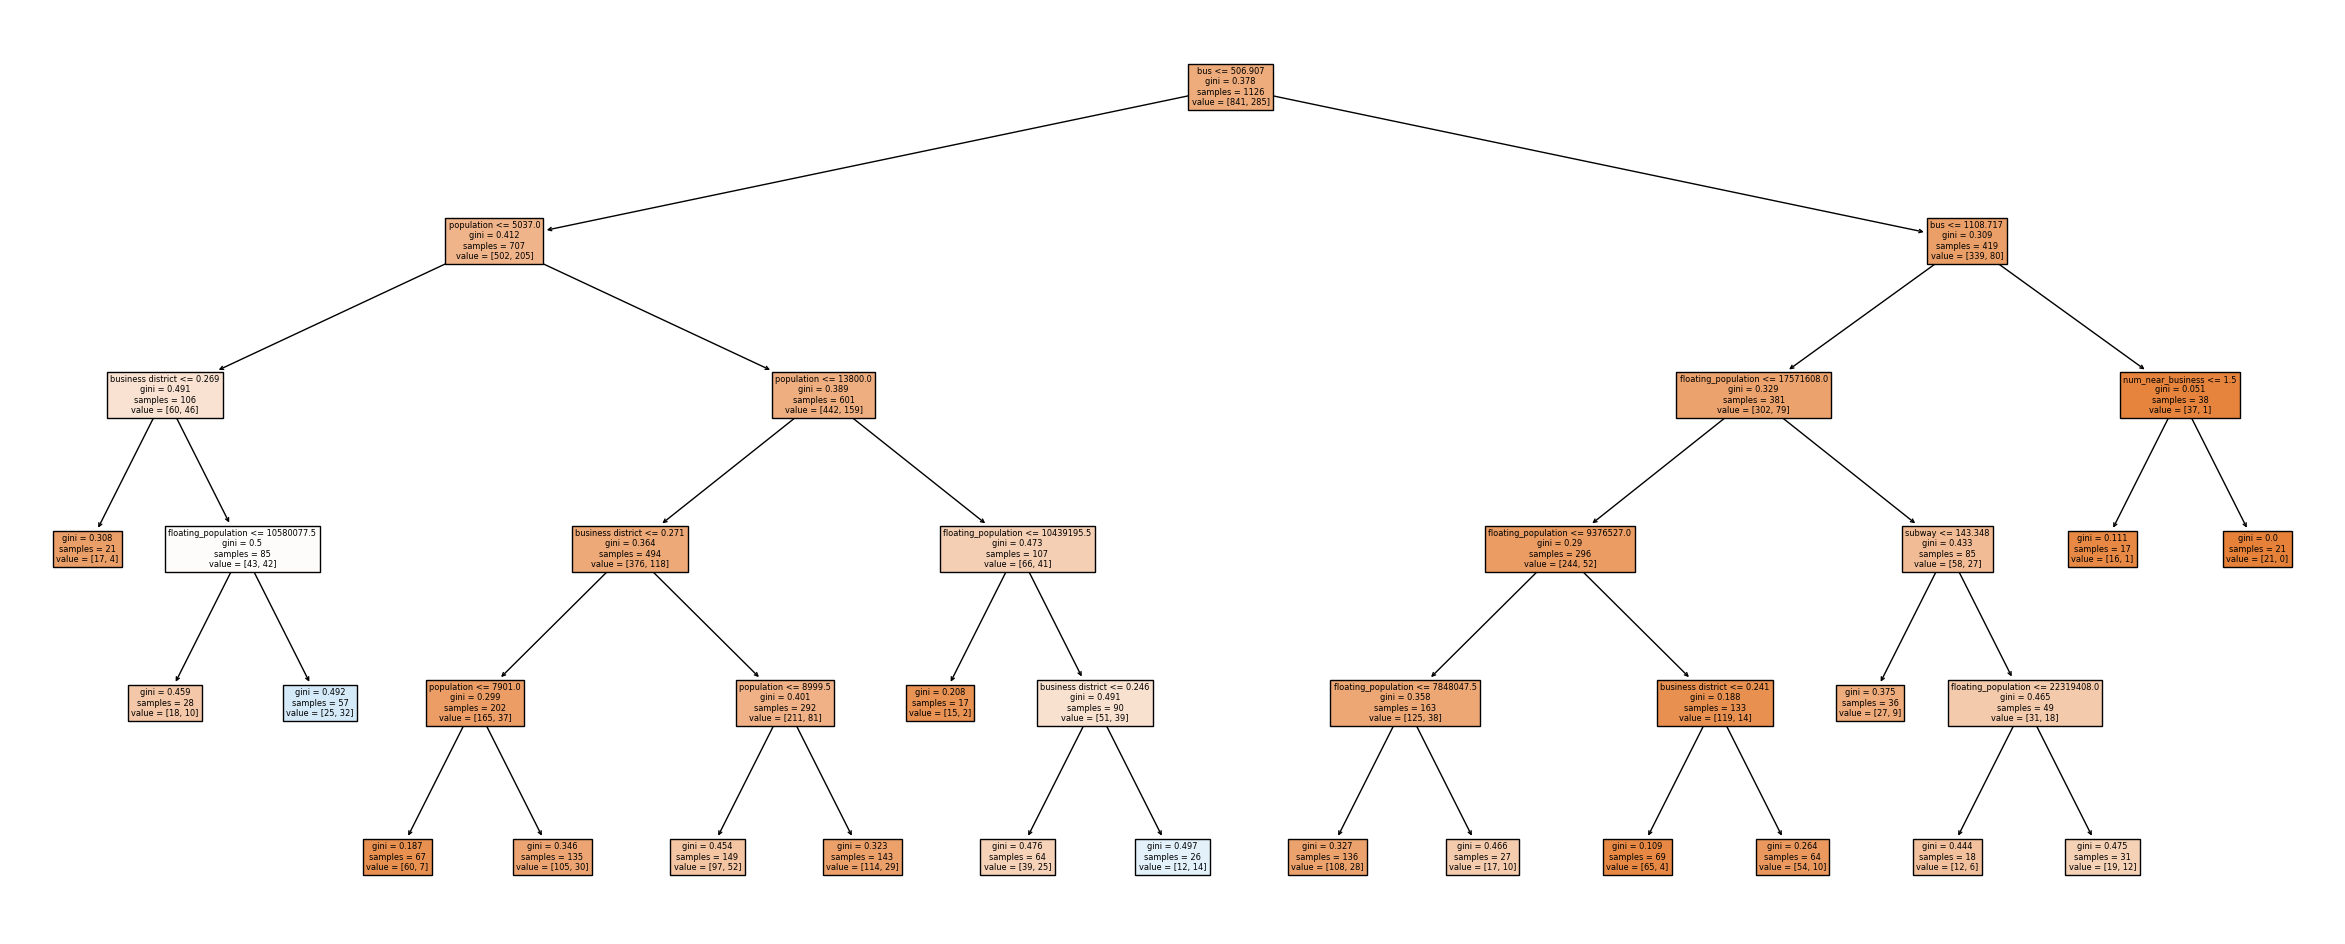

In [19]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize = (30, 12))
plot_tree(best_model, feature_names = ['bus', 'subway', 'population', 'business district', 'floating_population', 'num_near_business'], filled = True)
plt.show()